In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
#pd.options.display.max_rows = 6000
#pd.options.display.max_columns = 6000

In [42]:
#data1 = pd.read_csv("./Data/tn.movie_budgets.csv.gz")
#data1.info()
title_basics = pd.read_csv('./Data/imdb.title.basics.csv.gz')
title_ratings = pd.read_csv("./Data/imdb.title.ratings.csv.gz")
movie_budgets = pd.read_csv('./Data/tn.movie_budgets.csv.gz')

In [43]:
imdb_data = pd.merge(title_basics, title_ratings, how = 'inner', on = 'tconst')
imdb_data.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [44]:
imdb_data = imdb_data.drop(columns='runtime_minutes')

In [45]:
imdb_data = imdb_data.dropna(subset=['genres'])

In [46]:
imdb_data = imdb_data.rename(columns={'primary_title': 'movie'})

In [47]:
mdf = pd.merge(imdb_data, movie_budgets, on=['movie'], how='inner')

In [48]:
mdf = mdf.drop_duplicates(subset=['movie'])

In [49]:
mdf2 = mdf.copy()
mdf2['production_budget'] = mdf2['production_budget'].map(lambda x: x.lstrip('$'))
mdf2['domestic_gross'] = mdf2['domestic_gross'].map(lambda x: x.lstrip('$'))
mdf2['worldwide_gross'] = mdf2['worldwide_gross'].map(lambda x: x.lstrip('$'))

In [50]:
mdf2['production_budget']=mdf2['production_budget'].str.replace(',','')
mdf2['domestic_gross']=mdf2['domestic_gross'].str.replace(',','')
mdf2['worldwide_gross']=mdf2['worldwide_gross'].str.replace(',','')

In [51]:
mdf2 = mdf2.astype({'production_budget': 'int64'})
mdf2 = mdf2.astype({'domestic_gross': 'int64'})
mdf2 = mdf2.astype({'worldwide_gross': 'int64'})

In [52]:
mdf2 = mdf2[mdf2.worldwide_gross != 0]
mdf2 = mdf2[mdf2.domestic_gross != 0]

In [53]:
mdf2['profit'] = mdf2['worldwide_gross'] - mdf2['production_budget']
mdf2['ROI'] = (mdf2['profit'] / mdf2['production_budget']) * 100
mdf2 = mdf2.round({'ROI': 2})

In [54]:
mdf2["release_year"]= [x[7:] for x in mdf2["release_date"]]
mdf2["release_month"]= [x[:4] for x in mdf2["release_date"]]

In [55]:
#for the purpose of graphing, edited each month with numeric values in the beginning 
mdf2["release_month"] = mdf2["release_month"].str.replace("Jan", "01 Jan")
mdf2["release_month"] = mdf2["release_month"].str.replace("Feb", "02 Feb")
mdf2["release_month"] = mdf2["release_month"].str.replace("Mar", "03 Mar")
mdf2["release_month"] = mdf2["release_month"].str.replace("Apr", "04 Apr")
mdf2["release_month"] = mdf2["release_month"].str.replace("May", "05 May")
mdf2["release_month"] = mdf2["release_month"].str.replace("Jun", "06 Jun")
mdf2["release_month"] = mdf2["release_month"].str.replace("Jul", "07 Jul")
mdf2["release_month"] = mdf2["release_month"].str.replace("Aug", "08 Aug")
mdf2["release_month"] = mdf2["release_month"].str.replace("Sep", "09 Sep")
mdf2["release_month"] = mdf2["release_month"].str.replace("Oct", "10 Oct")
mdf2["release_month"] = mdf2["release_month"].str.replace("Nov", "11 Nov")
mdf2["release_month"] = mdf2["release_month"].str.replace("Dec", "12 Dec")

In [56]:
mdf2=mdf2.loc[mdf2['release_year'] >= '1990']

In [57]:
gf = mdf2[['movie', 'genres', 'production_budget', 'domestic_gross', 'worldwide_gross', 'profit', 'ROI', "release_month", 'release_year', "release_date"]]

In [58]:
gf['genres'] = gf['genres'].str.split(',')

<ipython-input-58-970854c872a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gf['genres'] = gf['genres'].str.split(',')


In [59]:
gf = gf.explode('genres')
gf

,movie,genres,production_budget,domestic_gross,worldwide_gross,profit,ROI,release_month,release_year,release_date
11,John Carter,Action,275000000,73058679,282778100,7778100,2.83,03 Mar,2012,"Mar 9, 2012"
11,John Carter,Adventure,275000000,73058679,282778100,7778100,2.83,03 Mar,2012,"Mar 9, 2012"
11,John Carter,Sci-Fi,275000000,73058679,282778100,7778100,2.83,03 Mar,2012,"Mar 9, 2012"
16,Real Steel,Action,110000000,85463309,263880341,153880341,139.89,10 Oct,2011,"Oct 7, 2011"
16,Real Steel,Drama,110000000,85463309,263880341,153880341,139.89,10 Oct,2011,"Oct 7, 2011"
...,...,...,...,...,...,...,...,...,...,...
2845,Hereditary,Drama,10000000,44069456,70133905,60133905,601.34,06 Jun,2018,"Jun 8, 2018"
2845,Hereditary,Horror,10000000,44069456,70133905,60133905,601.34,06 Jun,2018,"Jun 8, 2018"
2845,Hereditary,Mystery,10000000,44069456,70133905,60133905,601.34,06 Jun,2018,"Jun 8, 2018"
2852,Serendipity,Drama,28000000,50255310,77477297,49477297,176.70,10 Oct,2001,"Oct 5, 2001"


In [60]:
new_gf1 = gf[['movie', 'genres','ROI', "profit", 'release_year', "release_month", "release_date"]]
mean_ROI_by_month = new_gf1.groupby("release_month").mean()
mean_ROI_by_month 

,ROI,profit
release_month,,
01 Jan,789.917778,6.311481e+07
02 Feb,203.011897,5.668419e+07
03 Mar,163.690577,1.282468e+08
04 Apr,325.500165,9.187122e+07
05 May,176.869518,2.218598e+08
06 Jun,225.226283,7.950890e+07
07 Jul,460.432500,1.695145e+08
08 Aug,187.404316,1.092791e+08
09 Sep,154.835233,3.376799e+07


In [61]:
new_gf1_Horror = new_gf1[new_gf1["genres"]== "Horror"]
new_gf1_Mystery = new_gf1[new_gf1["genres"]== "Mystery"]
new_gf1_Thriller = new_gf1[new_gf1["genres"]== "Thriller"]
new_gf1_Music = new_gf1[new_gf1["genres"]== "Music"]
new_gf1_Sci_Fi = new_gf1[new_gf1["genres"]== "Sci-Fi"]

In [62]:
new_gf2 = new_gf1.groupby(["genres"], as_index=False).mean()
new_gf2 = new_gf2.sort_values(by = "ROI", ascending=False)
new_gf2

,genres,ROI,profit
11,Horror,663.497931,4.344439e+07
14,Mystery,519.269706,4.830093e+07
19,Thriller,406.547284,1.070304e+08
12,Music,403.540000,1.136261e+08
17,Sci-Fi,317.530500,3.048415e+08
15,News,289.420000,3.473058e+07
6,Documentary,287.279200,4.106267e+07
2,Animation,284.208519,2.507086e+08
9,Fantasy,253.367045,1.255589e+08
16,Romance,244.556000,3.725398e+07


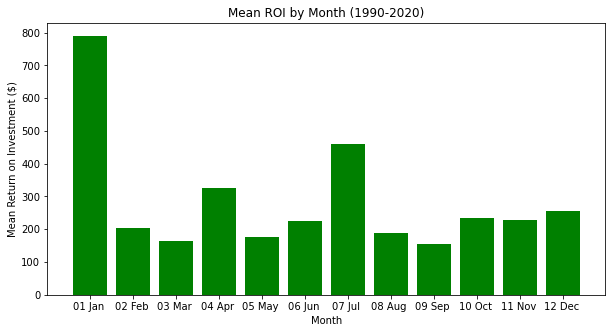

In [63]:
height = mean_ROI_by_month['ROI']
x = range(12)
labels = mean_ROI_by_month .index

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Month (1990-2020)")
ax.set_ylabel("Mean Return on Investment ($)")
ax.set_xlabel("Month");

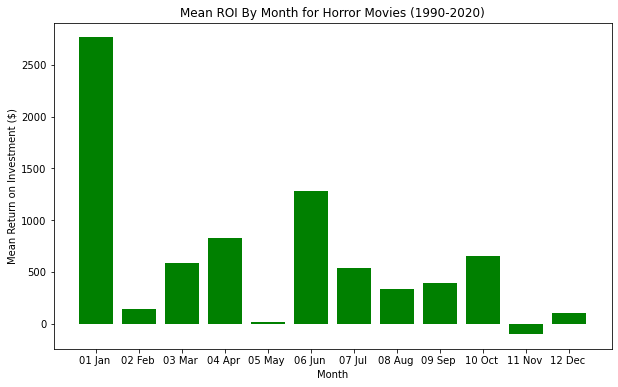

In [64]:
new_gf1_Horror_Grouped = new_gf1_Horror.groupby(["release_month"], as_index=False).mean()
new_gf1_Horror_Grouped = new_gf1_Horror_Grouped.set_index("release_month")

height = new_gf1_Horror_Grouped['ROI']
x = range(12)
labels = new_gf1_Horror_Grouped.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI By Month for Horror Movies (1990-2020)")
ax.set_ylabel("Mean Return on Investment ($)")
ax.set_xlabel("Month");

<ipython-input-66-c806da833e7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_gf1_Horror['converted'] = pd.to_datetime(pd.Series(new_gf1_Horror["release_date"]))
<ipython-input-66-c806da833e7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_gf1_Horror["day of the week"] = new_gf1_Horror["converted"].dt.day_name()


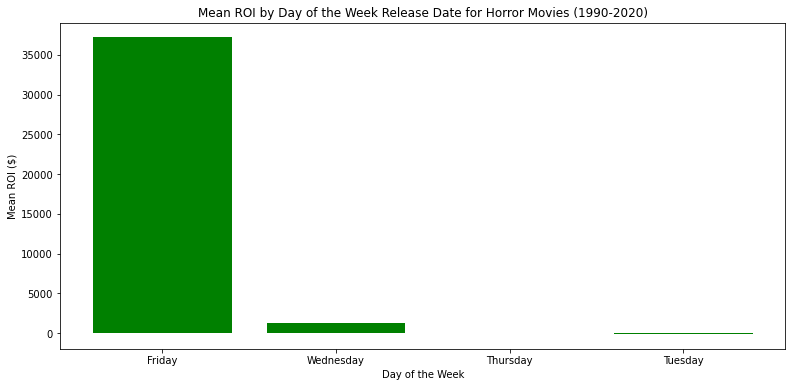

In [66]:
new_gf1_Horror['converted'] = pd.to_datetime(pd.Series(new_gf1_Horror["release_date"]))
new_gf1_Horror["day of the week"] = new_gf1_Horror["converted"].dt.day_name()
new_gf1_Horror_WeekName = new_gf1_Horror.groupby("day of the week").sum()
new_gf1_Horror_WeekName = new_gf1_Horror_WeekName.sort_values("ROI", ascending=False)

height = new_gf1_Horror_WeekName['ROI']
x = range(4)
labels = new_gf1_Horror_WeekName.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Day of the Week Release Date for Horror Movies (1990-2020)")
ax.set_ylabel("Mean ROI ($)")
ax.set_xlabel("Day of the Week");

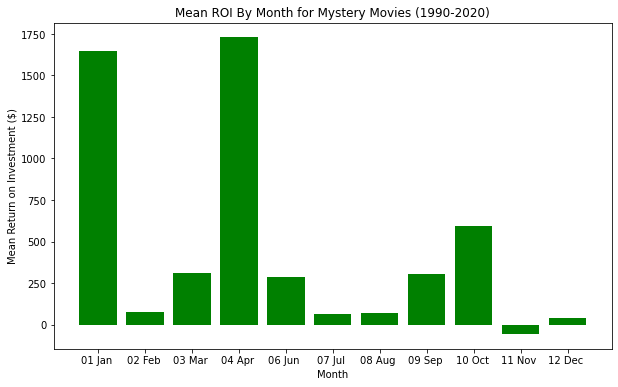

In [72]:
new_gf1_Mystery_Grouped = new_gf1_Mystery.groupby(["release_month"], as_index=False).mean()
new_gf1_Mystery_Grouped = new_gf1_Mystery_Grouped.set_index("release_month")

height = new_gf1_Mystery_Grouped['ROI']
x = range(11)
labels = new_gf1_Mystery_Grouped.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI By Month for Mystery Movies (1990-2020)")
ax.set_ylabel("Mean Return on Investment ($)")
ax.set_xlabel("Month");

<ipython-input-100-8fd560e9f78b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_gf1_Mystery['converted'] = pd.to_datetime(pd.Series(new_gf1_Mystery["release_date"]))
<ipython-input-100-8fd560e9f78b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_gf1_Mystery["day of the week"] = new_gf1_Mystery["converted"].dt.day_name()


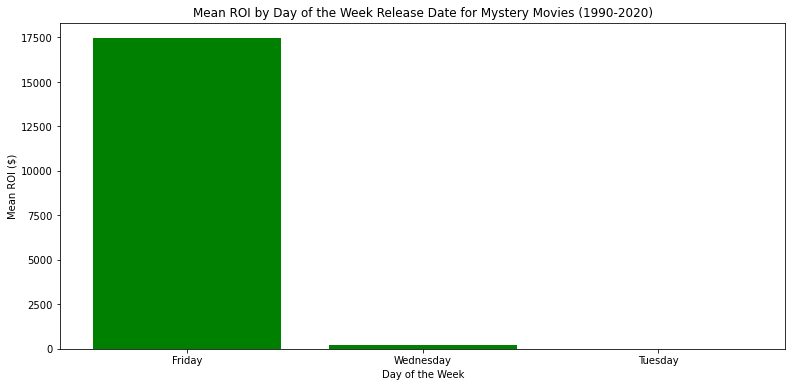

In [100]:
new_gf1_Mystery['converted'] = pd.to_datetime(pd.Series(new_gf1_Mystery["release_date"]))
new_gf1_Mystery["day of the week"] = new_gf1_Mystery["converted"].dt.day_name()
new_gf1_Mystery_WeekName = new_gf1_Mystery.groupby("day of the week").sum()
new_gf1_Mystery_WeekName = new_gf1_Mystery_WeekName.sort_values("ROI", ascending=False)

height = new_gf1_Mystery_WeekName['ROI']
x = range(3)
labels = new_gf1_Mystery_WeekName.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Day of the Week Release Date for Mystery Movies (1990-2020)")
ax.set_ylabel("Mean ROI ($)")
ax.set_xlabel("Day of the Week");

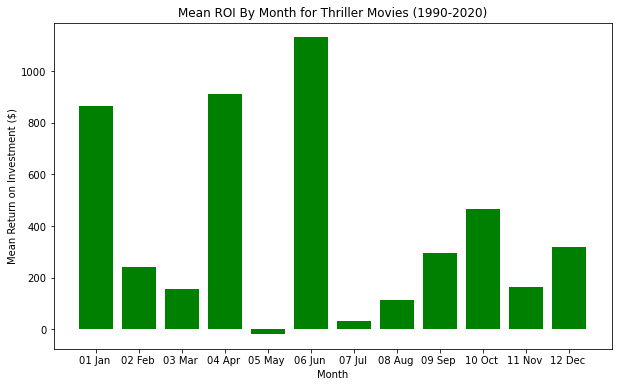

In [97]:
new_gf1_Thriller_Grouped = new_gf1_Thriller.groupby(["release_month"], as_index=False).mean()
new_gf1_Thriller_Grouped = new_gf1_Thriller_Grouped.set_index("release_month")

height = new_gf1_Thriller_Grouped['ROI']
x = range(12)
labels = new_gf1_Thriller_Grouped.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI By Month for Thriller Movies (1990-2020)")
ax.set_ylabel("Mean Return on Investment ($)")
ax.set_xlabel("Month");

<ipython-input-82-3ae4ec0b3486>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_gf1_Thriller['converted'] = pd.to_datetime(pd.Series(new_gf1_Thriller["release_date"]))
<ipython-input-82-3ae4ec0b3486>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_gf1_Thriller["day of the week"] = new_gf1_Thriller["converted"].dt.day_name()


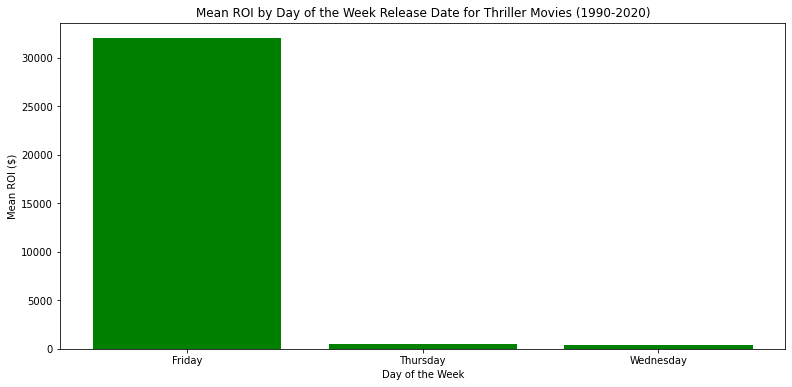

In [82]:
new_gf1_Thriller['converted'] = pd.to_datetime(pd.Series(new_gf1_Thriller["release_date"]))
new_gf1_Thriller["day of the week"] = new_gf1_Thriller["converted"].dt.day_name()
new_gf1_Thriller_WeekName = new_gf1_Thriller.groupby("day of the week").sum()
new_gf1_Thriller_WeekName = new_gf1_Thriller_WeekName.sort_values("ROI", ascending=False)

height = new_gf1_Thriller_WeekName['ROI']
x = range(3)
labels = new_gf1_Thriller_WeekName.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Day of the Week Release Date for Thriller Movies (1990-2020)")
ax.set_ylabel("Mean ROI ($)")
ax.set_xlabel("Day of the Week");

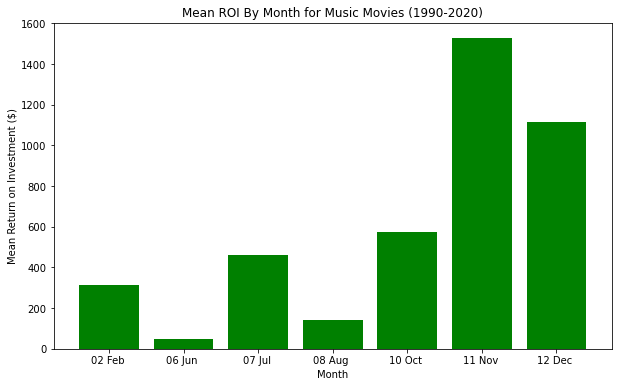

In [95]:
new_gf1_Music_Grouped = new_gf1_Music.groupby(["release_month"], as_index=False).mean()
new_gf1_Music_Grouped = new_gf1_Music_Grouped.set_index("release_month")

height = new_gf1_Music_Grouped['ROI']
x = range(7)
labels = new_gf1_Music_Grouped.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI By Month for Music Movies (1990-2020)")
ax.set_ylabel("Mean Return on Investment ($)")
ax.set_xlabel("Month");

<ipython-input-86-b23c28f3aff9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_gf1_Music['converted'] = pd.to_datetime(pd.Series(new_gf1_Music["release_date"]))
<ipython-input-86-b23c28f3aff9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_gf1_Music["day of the week"] = new_gf1_Music["converted"].dt.day_name()


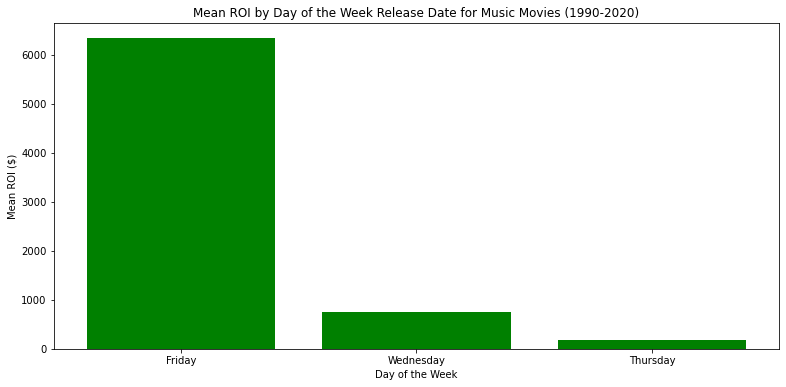

In [86]:
new_gf1_Music['converted'] = pd.to_datetime(pd.Series(new_gf1_Music["release_date"]))
new_gf1_Music["day of the week"] = new_gf1_Music["converted"].dt.day_name()
new_gf1_Music_WeekName = new_gf1_Music.groupby("day of the week").sum()
new_gf1_Music_WeekName = new_gf1_Music_WeekName.sort_values("ROI", ascending=False)

height = new_gf1_Music_WeekName['ROI']
x = range(3)
labels = new_gf1_Music_WeekName.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Day of the Week Release Date for Music Movies (1990-2020)")
ax.set_ylabel("Mean ROI ($)")
ax.set_xlabel("Day of the Week");

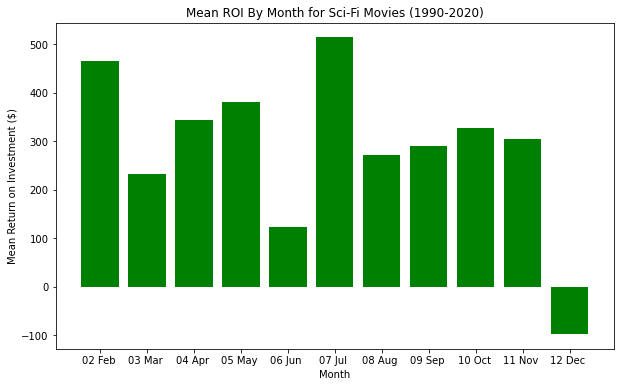

In [93]:
new_gf1_Sci_Fi_Grouped = new_gf1_Sci_Fi.groupby(["release_month"], as_index=False).mean()
new_gf1_Sci_Fi_Grouped = new_gf1_Sci_Fi_Grouped.set_index("release_month")

height = new_gf1_Sci_Fi_Grouped['ROI']
x = range(11)
labels = new_gf1_Sci_Fi_Grouped.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI By Month for Sci-Fi Movies (1990-2020)")
ax.set_ylabel("Mean Return on Investment ($)")
ax.set_xlabel("Month");

<ipython-input-88-c67617faacd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_gf1_Sci_Fi['converted'] = pd.to_datetime(pd.Series(new_gf1_Sci_Fi["release_date"]))
<ipython-input-88-c67617faacd6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_gf1_Sci_Fi["day of the week"] = new_gf1_Sci_Fi["converted"].dt.day_name()


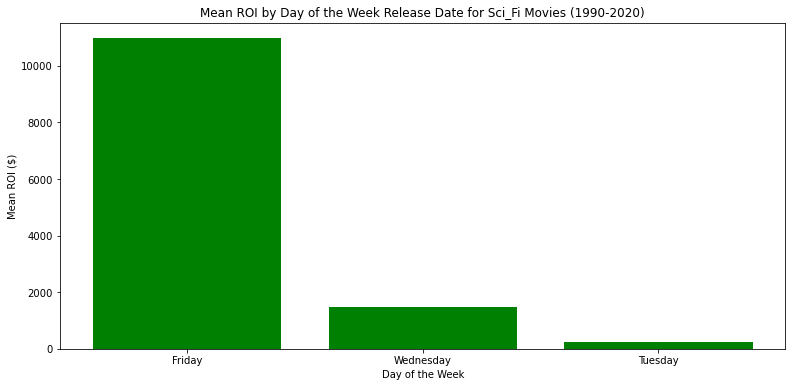

In [88]:
new_gf1_Sci_Fi['converted'] = pd.to_datetime(pd.Series(new_gf1_Sci_Fi["release_date"]))
new_gf1_Sci_Fi["day of the week"] = new_gf1_Sci_Fi["converted"].dt.day_name()
new_gf1_Sci_Fi_WeekName = new_gf1_Sci_Fi.groupby("day of the week").sum()
new_gf1_Sci_Fi_WeekName = new_gf1_Sci_Fi_WeekName.sort_values("ROI", ascending=False)

height = new_gf1_Sci_Fi_WeekName['ROI']
x = range(3)
labels = new_gf1_Sci_Fi_WeekName.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Mean ROI by Day of the Week Release Date for Sci_Fi Movies (1990-2020)")
ax.set_ylabel("Mean ROI ($)")
ax.set_xlabel("Day of the Week");

# old codes--ignore

In [ ]:
data1['production_budget'] = [row.replace('$','') for row in data1['production_budget']]
data1['production_budget'] = [row.replace(',','') for row in data1['production_budget']]

data1['domestic_gross'] = [row.replace('$','') for row in data1['domestic_gross']]
data1['domestic_gross'] = [row.replace(',','') for row in data1['domestic_gross']]

data1['worldwide_gross'] = [row.replace('$','') for row in data1['worldwide_gross']]
data1['worldwide_gross'] = [row.replace(',','') for row in data1['worldwide_gross']]




data1['domestic_gross'] = [int(row) for row in data1['domestic_gross']]
data1['production_budget'] = [int(row) for row in data1['production_budget']]
data1['worldwide_gross'] = [int(row) for row in data1['worldwide_gross']]

data1['revenue'] = data1['domestic_gross']- data1['production_budget']

In [ ]:
#for the purpose of graphing, edited each month with numeric values in the beginning 
data1["release_month"] = data1["release_month"].str.replace("Jan", "01 Jan")
data1["release_month"] = data1["release_month"].str.replace("Feb", "02 Feb")
data1["release_month"] = data1["release_month"].str.replace("Mar", "03 Mar")
data1["release_month"] = data1["release_month"].str.replace("Apr", "04 Apr")
data1["release_month"] = data1["release_month"].str.replace("May", "05 May")
data1["release_month"] = data1["release_month"].str.replace("Jun", "06 Jun")
data1["release_month"] = data1["release_month"].str.replace("Jul", "07 Jul")
data1["release_month"] = data1["release_month"].str.replace("Aug", "08 Aug")
data1["release_month"] = data1["release_month"].str.replace("Sep", "09 Sep")
data1["release_month"] = data1["release_month"].str.replace("Oct", "10 Oct")
data1["release_month"] = data1["release_month"].str.replace("Nov", "11 Nov")
data1["release_month"] = data1["release_month"].str.replace("Dec", "12 Dec")
data1.shape

In [ ]:
data1 = data1[data1.worldwide_gross != 0]
data1.shape

In [ ]:
#data1 = data1[data1.domestic_gross != 0]
#data1.shape

In [ ]:
#data1 = data1[data1.production_budget != 0]
#data1.shape

In [ ]:
data1 = data1[data1.release_year != 2020]
data1
#data1["release_year"].unique()

In [ ]:
#group the dataset by month for the entire dataset
grouped_by_month = data1.groupby(["release_month"]).sum()
grouped_by_month

In [ ]:
grouped_by_year = data1.groupby(["release_year"]).sum()
grouped_by_year.shape

In [ ]:
height = grouped_by_year['revenue']
x = range(159)
labels = grouped_by_year.index

fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Revenue by Year (1915-2020)")
ax.set_ylabel("Revenue ($)")
ax.set_xlabel("Year");

In [ ]:
#an overview of revenue by month from 1915-2020

height = grouped_by_month['revenue']
x = range(12)
labels = grouped_by_month.index

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Revenue by Month (1915-2020)")
ax.set_ylabel("Revenue ($)")
ax.set_xlabel("Month");

In [ ]:
data1_2019 = data1[data1["release_year"] == "2019"]
data1_2019 = data1_2019.drop("id", axis=1)
data1_2019 = data1_2019.groupby("release_month").sum()
data1_2019.shape
#data1_2019["release_month"].unique()
#data1_2019.set_index("release_month")
#data1_2019.groupby("release_month").sum()

In [ ]:
height = data1_2019['revenue']
x = range(5)
labels = data1_2019.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Revenue by Month (2019)")
ax.set_ylabel("Revenue ($)")
ax.set_xlabel("Month");

In [ ]:
data1_2018 = data1[data1["release_year"] == "2018"]
data1_2018 = data1_2018.drop("id", axis=1)
data1_2018 = data1_2018.groupby("release_month").sum()
data1_2018
#data1_2018["release_month"].unique()
#data1_2018.set_index("release_month")
#data1_2018.groupby("release_month").sum()

In [ ]:
height = data1_2018['revenue']
x = range(12)
labels = data1_2018.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Revenue by Month (2018)")
ax.set_ylabel("Revenue ($)")
ax.set_xlabel("Month");

In [ ]:
data1_2017 = data1[data1["release_year"] == "2017"]
data1_2017 = data1_2017.drop("id", axis=1)
data1_2017 = data1_2017.groupby("release_month").sum()
data1_2017
#data1_2017["release_month"].unique()
#data1_2017.set_index("release_month")
#data1_2017.groupby("release_month").sum()

In [ ]:
height = data1_2017['revenue']
x = range(12)
labels = data1_2017.index

fig, ax = plt.subplots(figsize=(13, 6))

ax.bar(x, height, tick_label=labels, color = "green")

ax.set_title("Revenue by Month (2017)")
ax.set_ylabel("Revenue ($)")
ax.set_xlabel("Month");

In [ ]:
for x in data1["release_month"]:
    if x == "Dec":
        data1["release_month_new"] == "12 Dec"

In [ ]:
for x in data1["release_month_new"]:
    if x == "Jan":
        data1["release_month_new"][x] == "01 Jan"
    elif x == "Feb":
        return "02 Feb"
    elif x == "Mar":
        return "03 Mar"
    elif x == "Apr":
        return "04 Apr"
    elif x == "May":
        return "05 May"
    elif x == "Jun":
        return "06 Jun"
    elif x == "Jul":
        return "07 Jul"
    elif x == "Aug":
        return "08 Aug"
    elif x == "Sep":
        return "09 Sep"
    elif x == "Oct":
        return "10 Oct"
    elif x == "Nov":
        return "11 Nov"
    elif x == "Dec":
        return "12 Dec"